# get differential genes from deseq from data from Eileen White's lab

In [1]:
library( "DESeq2" )
library('tximport')
library('stringr')
library(dplyr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [147]:
out_file_path <- './'
data_dir <- paste(out_file_path,'data/white_lab/', sep = '')
counts_dir <- paste(data_dir,'counts_filtered_sex_chrom.csv', sep = '')
out_dir <- paste(out_file_path, 'white_results/', sep = '')
metadata_liver <- paste(data_dir,'metadata_liver.csv', sep = '')

**read in scRNA data**

In [68]:
counts <- read.csv(counts_dir, sep = ',', row.names = 1) # scrna
counts_colnames <- read.csv(paste(data_dir,'counts_colnames.csv', sep = ''))
colnames(counts) <- counts_colnames$X0
head(counts)

,12DarkATG7KOfemale1911-21-GNP,12DarkATG7KOfemale1911-22-iWAT,12DarkATG7KOfemale1911-23-BAT,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-25-Cerebellum,12DarkATG7KOfemale1914-26-GNP,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-28-BAT,12DarkATG7KOfemale1914-29-Cerebellum,12DarkATG7KOfemale1914-30-iWAT,⋯,6LightATG7WT1977-143-BAT,6LightATG7WT1977-144-Liver,6LightATG7WT2040-125-Cerebellum,6LightATG7WT2040-126-BAT,6LightATG7WT2040-127-GNP,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver,6LightATG7WT2041-78-BAT,6LightATG7WT2041-79-Cerebellum,6LightATG7WT2041-80-GNP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,15,12,12,2165,21,22,2125,13,19,23,⋯,5,2534,21,22,12,4015,3223,21,18,15
0610009B22Rik,306,419,430,353,198,373,388,425,201,360,⋯,373,318,272,445,581,460,402,199,264,583
0610009E02Rik,3,20,11,2,14,4,5,4,17,18,⋯,11,9,11,12,2,12,2,9,18,3
0610009L18Rik,246,103,31,14,24,309,13,25,11,75,⋯,14,2,46,46,262,26,18,45,50,246
0610010F05Rik,277,361,337,265,552,370,274,325,449,302,⋯,528,350,875,394,417,430,217,243,743,360
0610010K14Rik,11,45,9,12,64,11,15,6,50,46,⋯,21,17,52,31,13,27,20,35,52,15


In [69]:
metadata <- read.csv(metadata_liver)
metadata_colnames <- read.csv(paste(data_dir,'metadata_colnames_liver.csv', sep = ''))
rownames(metadata) <- metadata_colnames$X0
metadata

,X,organ,samp,time,genotype,gender
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-24-Liver,Liver,24,Dark,KO,female
12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-27-Liver,Liver,27,Dark,KO,female
12DarkATG7KOmale1935-36-Liver,12DarkATG7KOmale1935-36-Liver,Liver,36,Dark,KO,male
12DarkATG7WTmale1981-42-Liver,12DarkATG7WTmale1981-42-Liver,Liver,42,Dark,WT,male
12DarkATG7WTmale1983-32-Liver,12DarkATG7WTmale1983-32-Liver,Liver,32,Dark,WT,male
12LightATG7KOfemale1390-20-Liver,12LightATG7KOfemale1390-20-Liver,Liver,20,Light,KO,female
12LightATG7KOfemale1392-8-Liver,12LightATG7KOfemale1392-8-Liver,Liver,8,Light,KO,female
12LightATG7WTfemale2024-2-Liver,12LightATG7WTfemale2024-2-Liver,Liver,2,Light,WT,female
2DarkATG7KO1904-51-Liver,2DarkATG7KO1904-51-Liver,Liver,51,Dark,KO,male


In [70]:
counts_liver = counts[,metadata_colnames$X0]

In [71]:
head(counts_liver)

,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOmale1935-36-Liver,12DarkATG7WTmale1981-42-Liver,12DarkATG7WTmale1983-32-Liver,12LightATG7KOfemale1390-20-Liver,12LightATG7KOfemale1392-8-Liver,12LightATG7WTfemale2024-2-Liver,2DarkATG7KO1904-51-Liver,2DarkATG7KO2581-56-Liver,⋯,6DarkATG7WT2015-93-Liver,6DarkATG7WT2033-102-Liver,6DarkATG7WT2046-100-Liver,6LightATG7KO1921-122-Liver,6LightATG7KO1922-136-Liver,6LightATG7KO1956-133-Liver,6LightATG7WT1975-86-Liver,6LightATG7WT1977-144-Liver,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,2165,2125,2922,2347,2128,2194,2322,6111,2113,2635,⋯,2140,2546,2429,2230,1822,2189,2669,2534,4015,3223
0610009B22Rik,353,388,410,325,298,361,478,790,301,304,⋯,308,324,298,535,266,213,409,318,460,402
0610009E02Rik,2,5,10,6,2,1,9,11,8,6,⋯,4,7,5,12,5,4,14,9,12,2
0610009L18Rik,14,13,7,4,3,18,16,45,5,7,⋯,6,8,5,23,1,6,7,2,26,18
0610010F05Rik,265,274,168,213,257,215,298,445,154,124,⋯,230,350,300,428,284,62,320,350,430,217
0610010K14Rik,12,15,36,18,13,12,27,117,29,33,⋯,27,18,20,15,19,24,18,17,27,20


In [72]:
head(metadata)

,X,organ,samp,time,genotype,gender
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-24-Liver,Liver,24,Dark,KO,female
12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-27-Liver,Liver,27,Dark,KO,female
12DarkATG7KOmale1935-36-Liver,12DarkATG7KOmale1935-36-Liver,Liver,36,Dark,KO,male
12DarkATG7WTmale1981-42-Liver,12DarkATG7WTmale1981-42-Liver,Liver,42,Dark,WT,male
12DarkATG7WTmale1983-32-Liver,12DarkATG7WTmale1983-32-Liver,Liver,32,Dark,WT,male
12LightATG7KOfemale1390-20-Liver,12LightATG7KOfemale1390-20-Liver,Liver,20,Light,KO,female


# run deseq

In [73]:
dds <- DESeqDataSetFromMatrix(countData=counts_liver, 
                              colData=metadata, 
                              design=~gender + time + genotype)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [74]:
startTime <- Sys.time()
dds <- DESeq(dds)
print(Sys.time() - startTime)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 103 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



Time difference of 23.74883 secs


In [77]:
res <- results(dds)

In [78]:
resultsNames(dds)

[1] "Intercept"             "gender_male_vs_female" "time_Light_vs_Dark"   
[4] "genotype_WT_vs_KO"

In [79]:
write.csv(res, file=paste(out_dir, 'deseq_genes_liver_WT_vs_KO.csv', sep = ''))

In [80]:
write.csv(results(dds, name = 'gender_male_vs_female'), file=paste(out_dir, 'deseq_genes_liver_male_vs_female.csv', sep = ''))

In [81]:
write.csv(results(dds, name = 'time_Light_vs_Dark'), file=paste(out_dir, 'deseq_genes_liver_light_vs_dark.csv', sep = ''))

# only take male 6 weeks

In [153]:
counts <- read.csv(counts_dir, sep = ',', row.names = 1) # scrna
counts_colnames <- read.csv(paste(data_dir,'counts_colnames_sex_chrom.csv', sep = ''))
colnames(counts) <- counts_colnames$X0
head(counts)

,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOmale1935-36-Liver,12DarkATG7WTmale1981-42-Liver,12DarkATG7WTmale1983-32-Liver,12LightATG7KOfemale1390-20-Liver,12LightATG7KOfemale1392-8-Liver,12LightATG7WTfemale2024-2-Liver,2DarkATG7KO1904-51-Liver,2DarkATG7KO2581-56-Liver,⋯,6DarkATG7WT2015-93-Liver,6DarkATG7WT2033-102-Liver,6DarkATG7WT2046-100-Liver,6LightATG7KO1921-122-Liver,6LightATG7KO1922-136-Liver,6LightATG7KO1956-133-Liver,6LightATG7WT1975-86-Liver,6LightATG7WT1977-144-Liver,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,2165,2125,2922,2347,2128,2194,2322,6111,2113,2635,⋯,2140,2546,2429,2230,1822,2189,2669,2534,4015,3223
0610009B22Rik,353,388,410,325,298,361,478,790,301,304,⋯,308,324,298,535,266,213,409,318,460,402
0610009E02Rik,2,5,10,6,2,1,9,11,8,6,⋯,4,7,5,12,5,4,14,9,12,2
0610009L18Rik,14,13,7,4,3,18,16,45,5,7,⋯,6,8,5,23,1,6,7,2,26,18
0610010F05Rik,265,274,168,213,257,215,298,445,154,124,⋯,230,350,300,428,284,62,320,350,430,217
0610010K14Rik,12,15,36,18,13,12,27,117,29,33,⋯,27,18,20,15,19,24,18,17,27,20


In [154]:
metadata_all <- read.csv(paste(data_dir,'metadata_cleaned.csv', sep = ''))
#metadata_colnames <- read.csv(paste(data_dir,'metadata_colnames_liver.csv', sep = ''))
#rownames(metadata_all) <- metadata_colnames$X0
metadata_all

filename,Collection.Cycle,Gender,Mouse.ID,Weeks.Post.Deletion,Mouse.Genotype.Code,tissue
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
12DarkATG7KOfemale1911-21-GNP,Dark,Female,1911,12,M,GNP
12DarkATG7KOfemale1911-22-iWAT,Dark,Female,1911,12,M,iWAT
12DarkATG7KOfemale1911-23-BAT,Dark,Female,1911,12,M,BAT
12DarkATG7KOfemale1911-24-Liver,Dark,Female,1911,12,M,Liver
12DarkATG7KOfemale1911-25-Cerebellum,Dark,Female,1911,12,M,Cerebellum
12DarkATG7KOfemale1914-26-GNP,Dark,Female,1914,12,M,GNP
12DarkATG7KOfemale1914-27-Liver,Dark,Female,1914,12,M,Liver
12DarkATG7KOfemale1914-28-BAT,Dark,Female,1914,12,M,BAT
12DarkATG7KOfemale1914-29-Cerebellum,Dark,Female,1914,12,M,Cerebellum


In [155]:
metadata_filtered = metadata_all[metadata_all['Gender'] == 'Male', ]
metadata_filtered = metadata_filtered[metadata_filtered['tissue'] == 'Liver', ]
metadata_filtered = metadata_filtered[metadata_filtered['Weeks.Post.Deletion'] == 6, ]
metadata_filtered = metadata_filtered[metadata_filtered['filename'] != '12DarkATG7WTfemale2028-50-Liver', ]
metadata_filtered

,filename,Collection.Cycle,Gender,Mouse.ID,Weeks.Post.Deletion,Mouse.Genotype.Code,tissue
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
115,6DarkATG7KO1936-108-Liver,Dark,Male,1936,6,M,Liver
118,6DarkATG7KO1950-113-Liver,Dark,Male,1950,6,M,Liver
122,6DarkATG7WT2013-90-Liver,Dark,Male,2013,6,W,Liver
124,6DarkATG7WT2015-93-Liver,Dark,Male,2015,6,W,Liver
145,6LightATG7KO1956-133-Liver,Light,Male,1956,6,M,Liver
150,6LightATG7WT1975-86-Liver,Light,Male,1975,6,W,Liver
154,6LightATG7WT1977-144-Liver,Light,Male,1977,6,W,Liver


In [156]:
counts

,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOmale1935-36-Liver,12DarkATG7WTmale1981-42-Liver,12DarkATG7WTmale1983-32-Liver,12LightATG7KOfemale1390-20-Liver,12LightATG7KOfemale1392-8-Liver,12LightATG7WTfemale2024-2-Liver,2DarkATG7KO1904-51-Liver,2DarkATG7KO2581-56-Liver,⋯,6DarkATG7WT2015-93-Liver,6DarkATG7WT2033-102-Liver,6DarkATG7WT2046-100-Liver,6LightATG7KO1921-122-Liver,6LightATG7KO1922-136-Liver,6LightATG7KO1956-133-Liver,6LightATG7WT1975-86-Liver,6LightATG7WT1977-144-Liver,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,2165,2125,2922,2347,2128,2194,2322,6111,2113,2635,⋯,2140,2546,2429,2230,1822,2189,2669,2534,4015,3223
0610009B22Rik,353,388,410,325,298,361,478,790,301,304,⋯,308,324,298,535,266,213,409,318,460,402
0610009E02Rik,2,5,10,6,2,1,9,11,8,6,⋯,4,7,5,12,5,4,14,9,12,2
0610009L18Rik,14,13,7,4,3,18,16,45,5,7,⋯,6,8,5,23,1,6,7,2,26,18
0610010F05Rik,265,274,168,213,257,215,298,445,154,124,⋯,230,350,300,428,284,62,320,350,430,217
0610010K14Rik,12,15,36,18,13,12,27,117,29,33,⋯,27,18,20,15,19,24,18,17,27,20
0610012G03Rik,774,830,1094,825,701,1037,1178,2279,752,895,⋯,658,679,615,858,587,544,875,711,734,1043
0610030E20Rik,325,424,397,301,431,617,675,1652,516,690,⋯,472,786,545,803,623,538,843,796,1128,699
0610031O16Rik,365,248,381,286,401,371,209,1206,650,696,⋯,590,476,432,315,448,309,650,556,898,496


In [157]:
counts_liver = counts[, unlist(metadata_filtered['filename'])]

In [158]:
head(counts_liver)

,6DarkATG7KO1936-108-Liver,6DarkATG7KO1950-113-Liver,6DarkATG7WT2013-90-Liver,6DarkATG7WT2015-93-Liver,6LightATG7KO1956-133-Liver,6LightATG7WT1975-86-Liver,6LightATG7WT1977-144-Liver
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,2401,2754,2376,2140,2189,2669,2534
0610009B22Rik,423,406,402,308,213,409,318
0610009E02Rik,8,5,4,4,4,14,9
0610009L18Rik,9,4,5,6,6,7,2
0610010F05Rik,355,313,251,230,62,320,350
0610010K14Rik,16,31,20,27,24,18,17


In [159]:
dim(counts_liver)

[1] 17996     7

In [160]:
metadata_filtered

,filename,Collection.Cycle,Gender,Mouse.ID,Weeks.Post.Deletion,Mouse.Genotype.Code,tissue
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
115,6DarkATG7KO1936-108-Liver,Dark,Male,1936,6,M,Liver
118,6DarkATG7KO1950-113-Liver,Dark,Male,1950,6,M,Liver
122,6DarkATG7WT2013-90-Liver,Dark,Male,2013,6,W,Liver
124,6DarkATG7WT2015-93-Liver,Dark,Male,2015,6,W,Liver
145,6LightATG7KO1956-133-Liver,Light,Male,1956,6,M,Liver
150,6LightATG7WT1975-86-Liver,Light,Male,1975,6,W,Liver
154,6LightATG7WT1977-144-Liver,Light,Male,1977,6,W,Liver


In [161]:
# run deseq
dds_male <- DESeqDataSetFromMatrix(countData=counts_liver, 
                              colData=metadata_filtered, 
                              design=~Collection.Cycle + Mouse.Genotype.Code)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [162]:
startTime <- Sys.time()
dds_male <- DESeq(dds_male)
print(Sys.time() - startTime)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Time difference of 7.866127 secs


In [163]:
res_male <- results(dds_male)

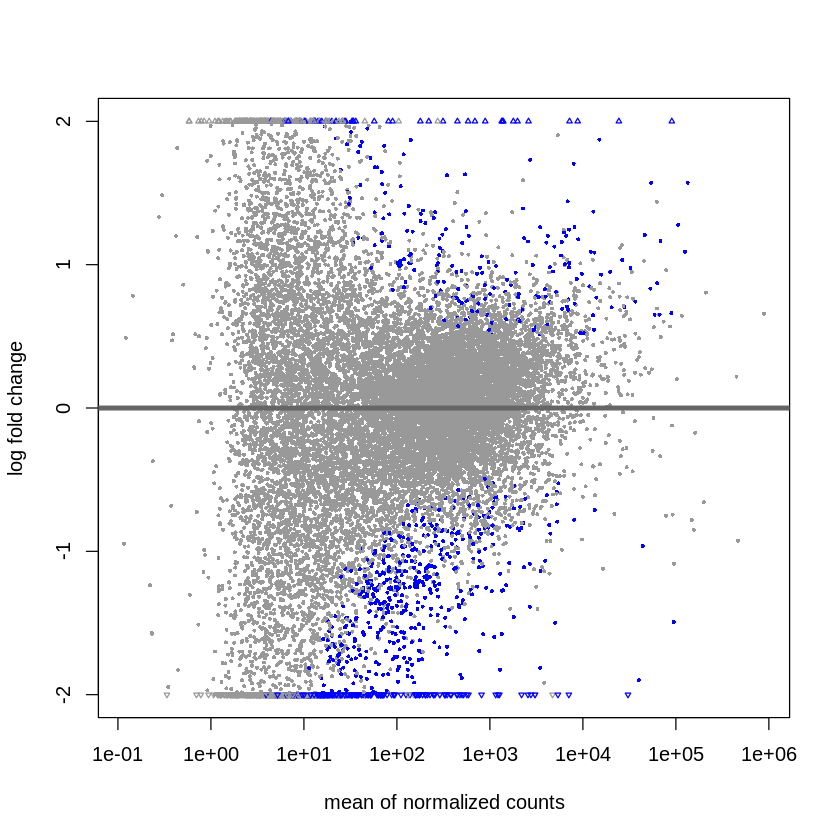

In [164]:
plotMA(res_male, ylim=c(-2,2))

In [165]:
resultsNames(dds_male)

[1] "Intercept"                      "Collection.Cycle_Light_vs_Dark"
[3] "Mouse.Genotype.Code_W_vs_M"

In [166]:
res_male

log2 fold change (MLE): Mouse.Genotype.Code W vs M 
Wald test p-value: Mouse.Genotype.Code W vs M 
DataFrame with 17996 rows and 6 columns
                baseMean log2FoldChange     lfcSE         stat    pvalue
               <numeric>      <numeric> <numeric>    <numeric> <numeric>
0610005C13Rik 2436.48507     -0.1050534  0.227635    -0.461500  0.644440
0610009B22Rik  343.25173      0.0867816  0.202556     0.428432  0.668337
0610009E02Rik    6.55242      0.1001481  0.790169     0.126743  0.899144
0610009L18Rik    5.61453     -0.4072516  0.891820    -0.456652  0.647921
0610010F05Rik  250.94243      0.5290725  0.379783     1.393093  0.163592
...                  ...            ...       ...          ...       ...
Zyg11a           68.3602    1.05896e+00  0.424827  2.49268e+00 0.0126783
Zyg11b          712.3887    7.50203e-01  0.452103  1.65936e+00 0.0970428
Zyx             687.2301   -2.78587e-01  0.222156 -1.25401e+00 0.2098366
Zzef1           703.3678   -9.50565e-07  0.212064 -4.48246

In [167]:
# write.csv(res_male, file=paste(out_dir, 'deseq_genes_liver_WT_vs_KO_male.csv', sep = ''))
# write.csv(results(dds_male, name = 'Collection.Cycle_Light_vs_Dark'), file=paste(out_dir, 'deseq_genes_liver_light_vs_dark_male.csv', sep = ''))